# 0.) Import the Credit Card Fraud Data From CCLE

In [190]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [191]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [133]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [192]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/fraudTest.csv")

In [193]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [196]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-196-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [197]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

<ipython-input-197-9dadc0b5ae72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [199]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [200]:
ros = RandomOverSampler(random_state = 0)
ros.fit(X_train,y_train)
over_X, over_y = ros.fit_resample(X_train,y_train)

In [201]:
rus = RandomUnderSampler(random_state = 0)
rus.fit(X_train,y_train)
under_X, under_y = rus.fit_resample(X_train,y_train)

In [202]:
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [149]:
from sklearn.linear_model import LogisticRegression

In [203]:
over_log = LogisticRegression()
over_log.fit(over_X, over_y)

LogisticRegression()

In [205]:
under_log = LogisticRegression()
under_log.fit(under_X, under_y)

LogisticRegression()

In [206]:
smote_mod = LogisticRegression()
smote_mod.fit(smote_X, smote_y)

LogisticRegression()

# 4.) Test the three models

In [219]:
y_pred1 = over_log.predict(X_test)
print(y_pred1)

[1 0 0 ... 0 0 1]


In [220]:
y_pred2 = under_log.predict(X_test)
print(y_pred2)

[1 0 0 ... 0 0 1]


In [221]:
y_pred3 = smote_mod.predict(X_test)
print(y_pred3)

[1 0 0 ... 0 0 1]


# 5.) Which performed best in Out of Sample metrics?

In [156]:
from sklearn import metrics

In [209]:
over_log.score(X_test, y_test)

0.8139770627894143

In [210]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix

array([[135230,  30861],
       [   152,    473]])

In [211]:
under_log.score(X_test, y_test)


0.8105580748098563

In [212]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[134657,  31434],
       [   149,    476]])

In [213]:
smote_mod.score(X_test, y_test)

0.8198433263753929

In [214]:
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3

array([[136210,  29881],
       [   154,    471]])

We can see that smote has the largest score, meaning that the accuracy of logistic regression classifier on test set is around 0.82. Also, from the confusion matrix, we can see thet oversampling gives more true positive and less false positive. Therefore, oversampling performed the best.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [215]:
raw_temp = pd.concat([X_train, y_train], axis = 1)

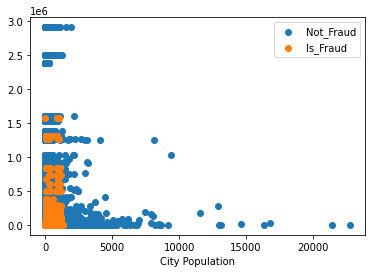

In [225]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Not_Fraud","Is_Fraud"])
plt.xlabel("Amount")
plt.xlabel("City Population")
plt.show()

In [226]:
smote_temp = pd.concat([smote_X, smote_y], axis = 1)

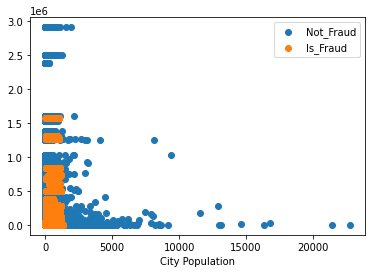

In [228]:
plt.scatter(smote_temp[smote_temp["is_fraud"] == 0]["amt"], smote_temp[smote_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(smote_temp[smote_temp["is_fraud"] == 1]["amt"], smote_temp[smote_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Not_Fraud","Is_Fraud"])
plt.xlabel("Amount")
plt.xlabel("City Population")
plt.show()